In [1]:
import sys
import tensorflow as tf

sys.path.append("/visuworks/Blindless_AIFFELTON/Models")
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Models/Dense_Unet")
import dense_unet


# Insert Path
FILE_NAME = 'dense_unet_30ep_1024_sG_history'
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Models/Dense_Unet/model_parameters/dense_unet_40ep_fG.h5"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Models/Dense_Unet/history/" + FILE_NAME + ".json"
SOURCE = '/visuworks/Dataset/Selected Dataset 2'
INPUT_SHAPE = (512, 512, 1)
RESIZE_SHAPE = (1024, 1024, 1)

2024-01-29 07:30:03.140294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 07:30:03.140319: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 07:30:03.141401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 07:30:03.146702: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-29 07:30:03.720375: W tensorflow/compiler/tf2

In [3]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}


# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0], is_train=False)

# Create train, test generator
train_generator = data_generator.SlicedDataGenerator(
    SOURCE, 
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.SlicedDataGenerator(
    SOURCE,
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=False,
    augmentation= test_preproc
)

# Create model
model = dense_unet.build_model(INPUT_SHAPE)

In [5]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=False,
                  apply_weight_decay=False)

Epoch 1/30


2024-01-29 07:31:32.877067: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-29 07:31:35.543342: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 736.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-29 07:31:35.543379: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 736.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-29 07:31:35.543394: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 736.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there co

1177/1177 [==============================] - 269s 214ms/step - loss: 0.2963 - sensitivity: 0.6918 - specificity: 0.9719 - accuracy: 0.9535 - val_loss: 0.2822 - val_sensitivity: 0.6844 - val_specificity: 0.9787 - val_accuracy: 0.9605
Epoch 2/30
1177/1177 [==============================] - 254s 216ms/step - loss: 0.2360 - sensitivity: 0.7401 - specificity: 0.9811 - accuracy: 0.9656 - val_loss: 0.2656 - val_sensitivity: 0.6727 - val_specificity: 0.9833 - val_accuracy: 0.9637
Epoch 3/30
1177/1177 [==============================] - 251s 213ms/step - loss: 0.2232 - sensitivity: 0.7485 - specificity: 0.9823 - accuracy: 0.9674 - val_loss: 0.2591 - val_sensitivity: 0.7615 - val_specificity: 0.9727 - val_accuracy: 0.9601
Epoch 4/30
1177/1177 [==============================] - 252s 214ms/step - loss: 0.2141 - sensitivity: 0.7533 - specificity: 0.9834 - accuracy: 0.9688 - val_loss: 0.2753 - val_sensitivity: 0.6327 - val_specificity: 0.9866 - val_accuracy: 0.9642
Epoch 5/30
1177/1177 [=============

2024-01-29 02:16:33.108315: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


125/125 [==============================] - 41s 304ms/step - loss: 0.1762 - sensitivity: 0.8226 - specificity: 0.9813 - accuracy: 0.9705
Loss: 0.1761692464351654
Sensitivity: 0.822592556476593
Specificity: 0.9813446998596191
Accuracy: 0.9704976081848145


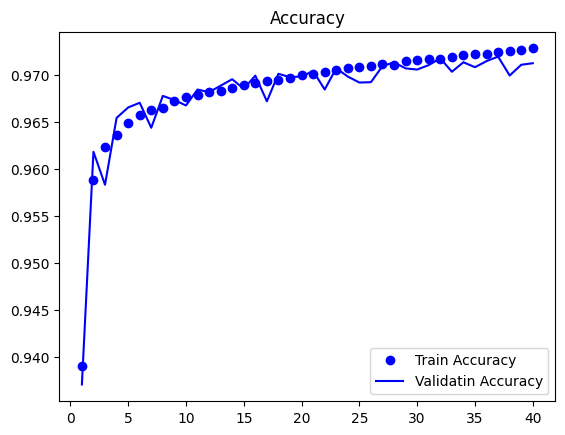

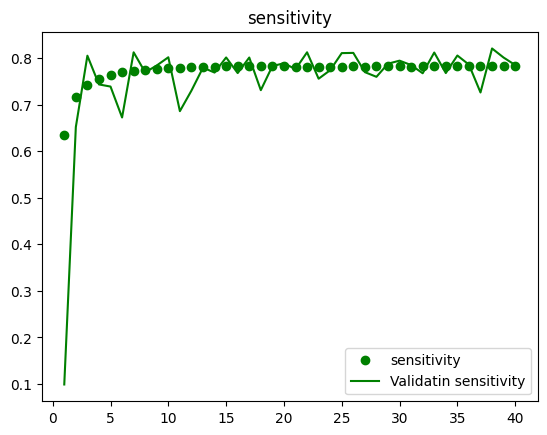

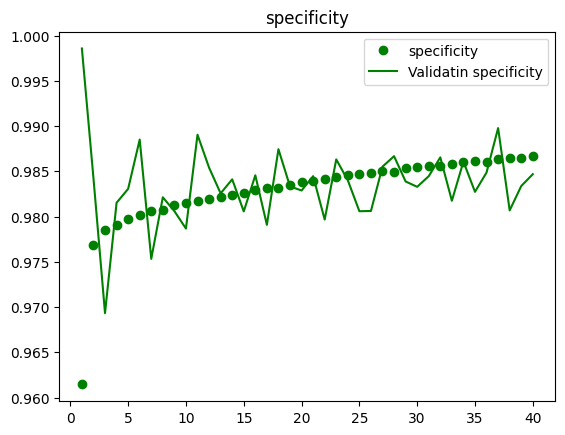

<Figure size 640x480 with 0 Axes>

: 

In [3]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot history and pring evaluation of test dataset
metrics.print_evaluation(model, test_generator)
check_result.plot_history(HISTORY_PATH)

2024-01-26 05:50:59.118514: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


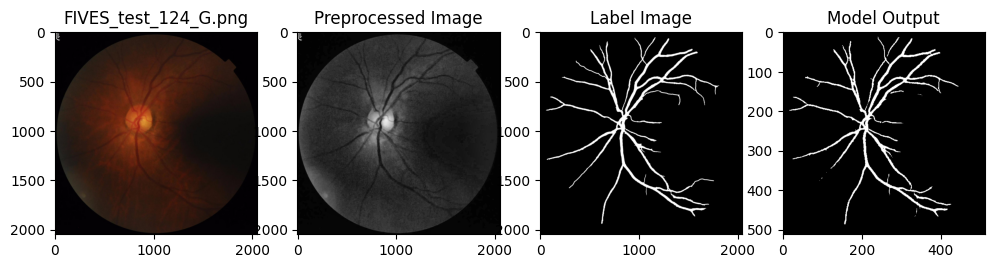

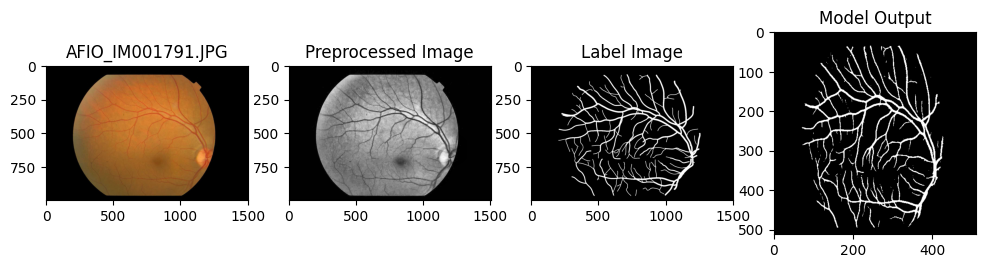

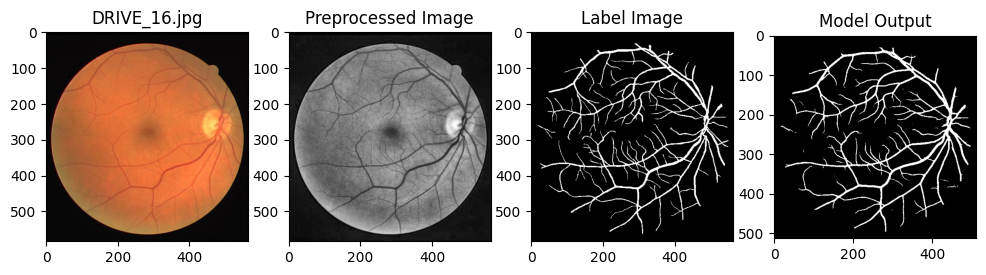

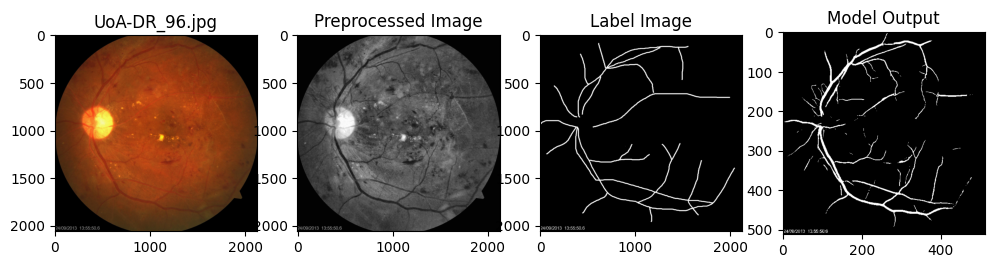

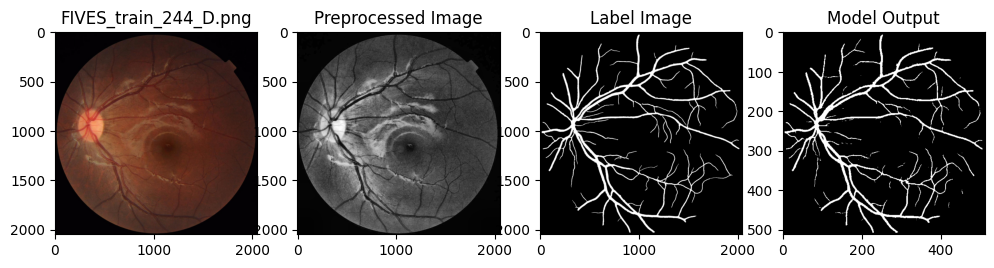

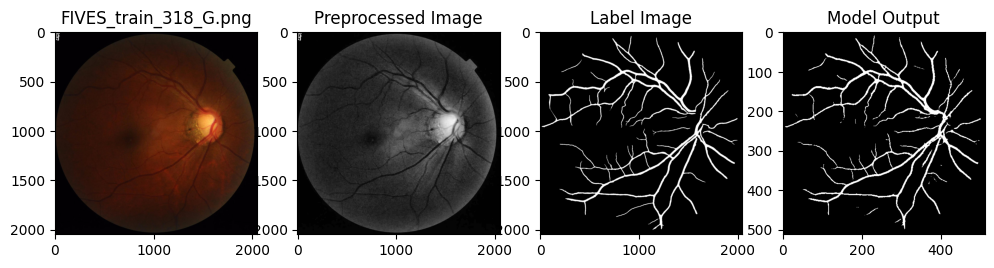

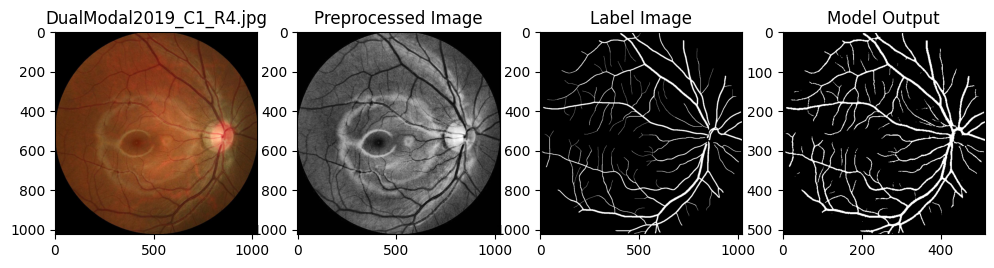

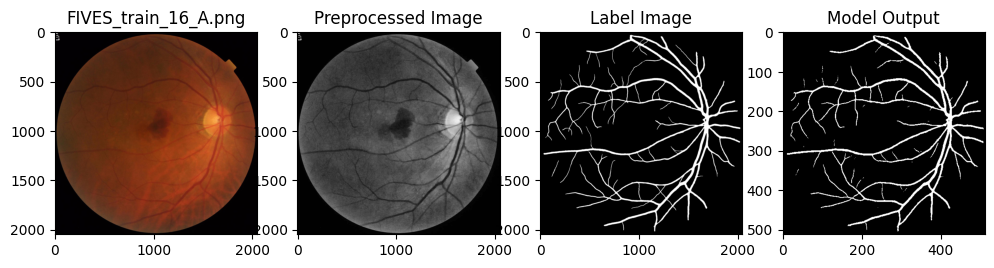

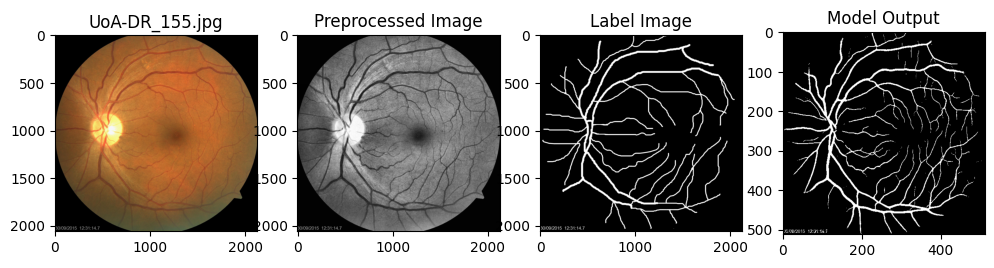

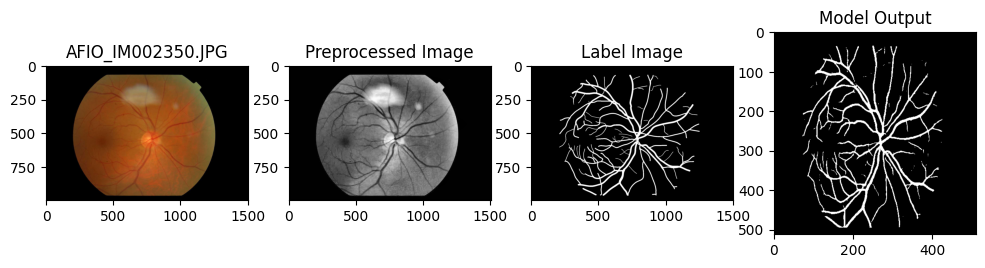

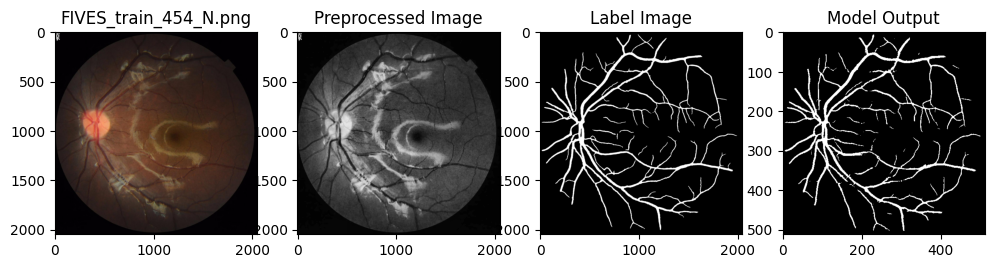

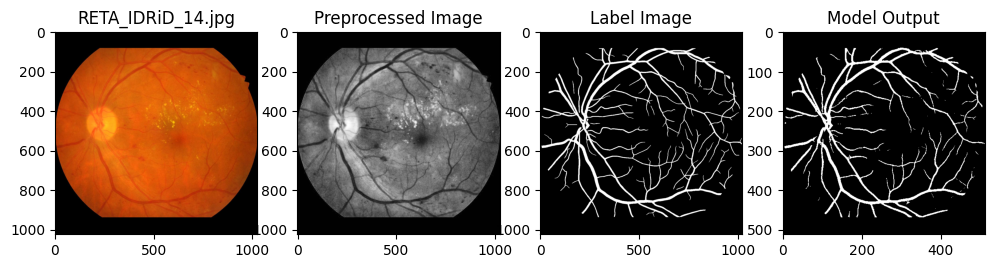

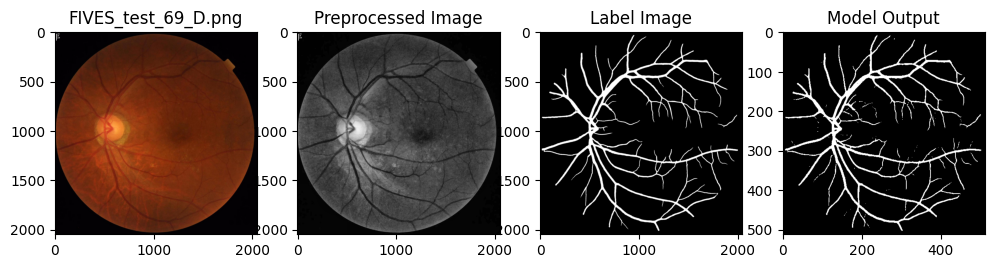

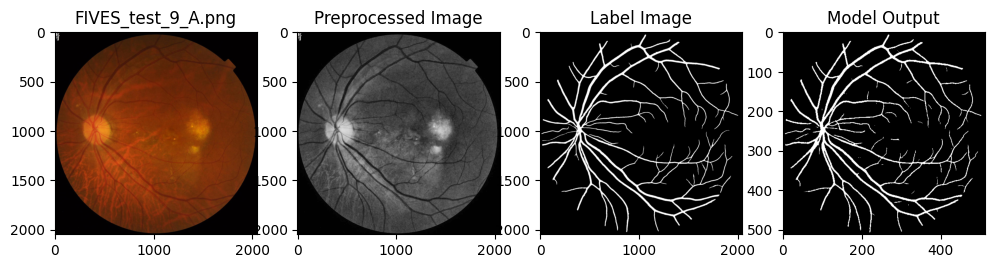

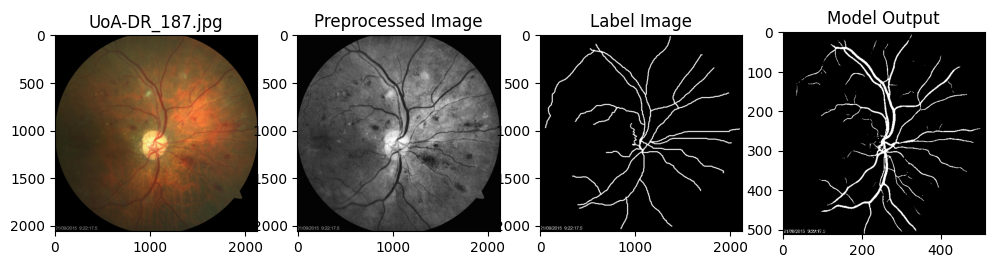

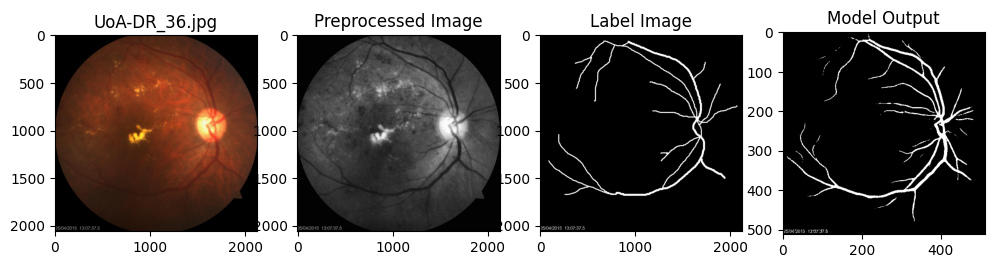

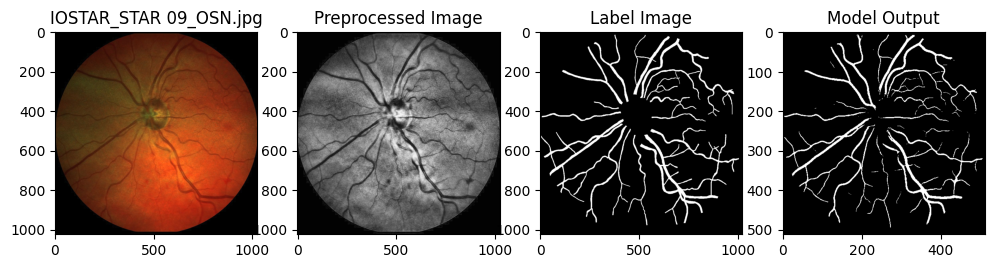

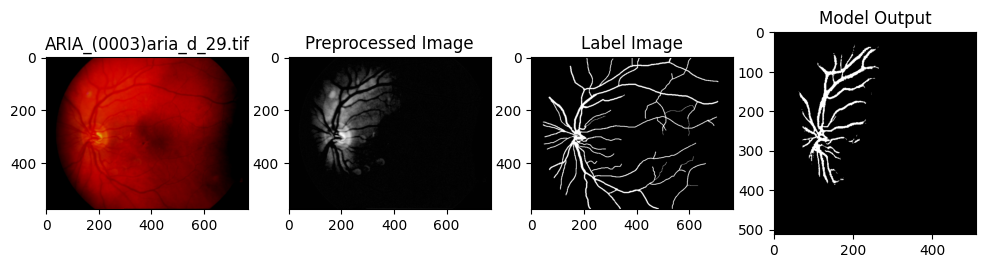

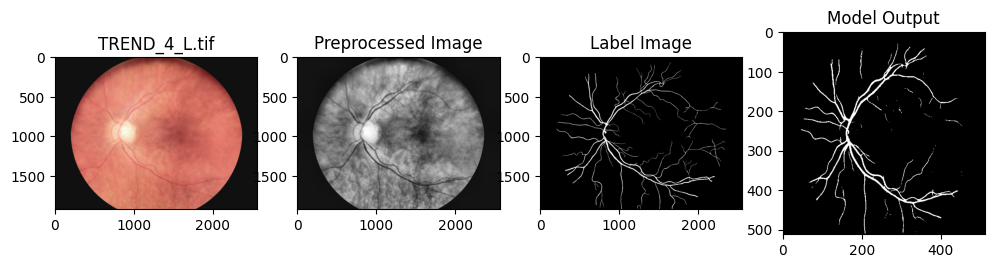

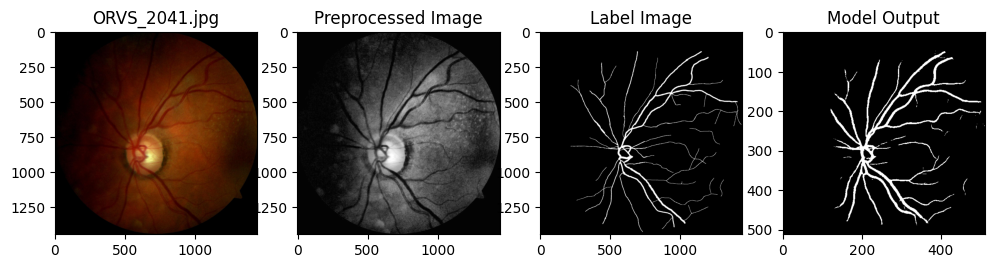

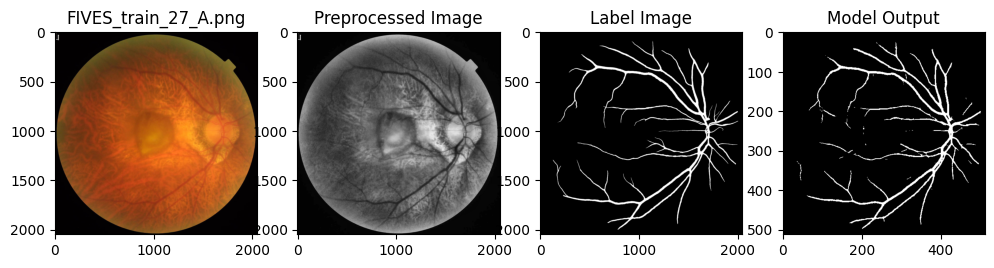

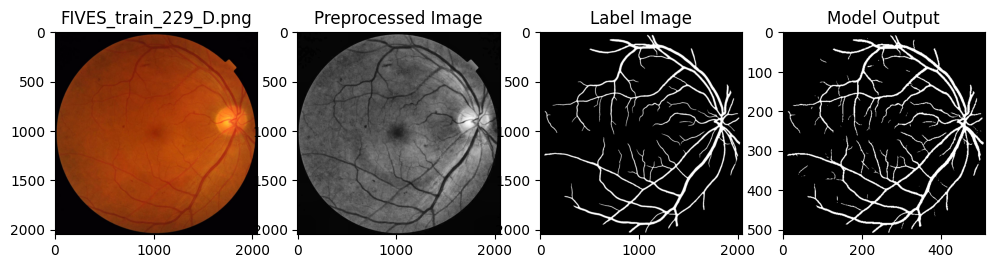

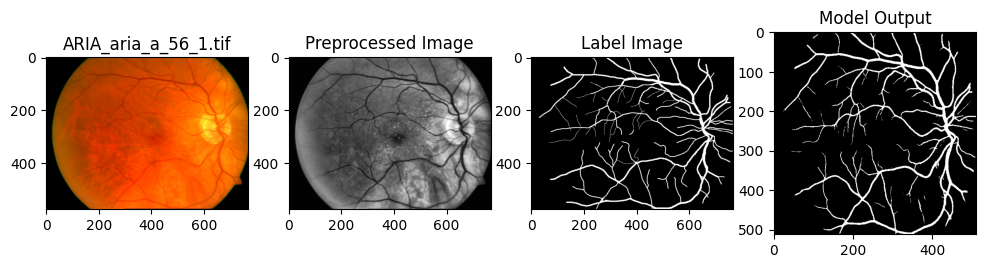

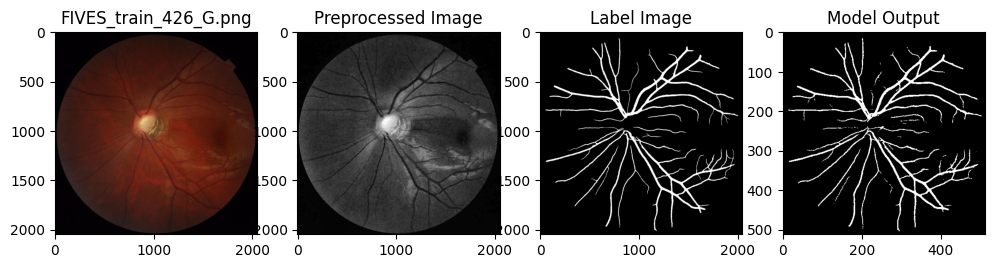

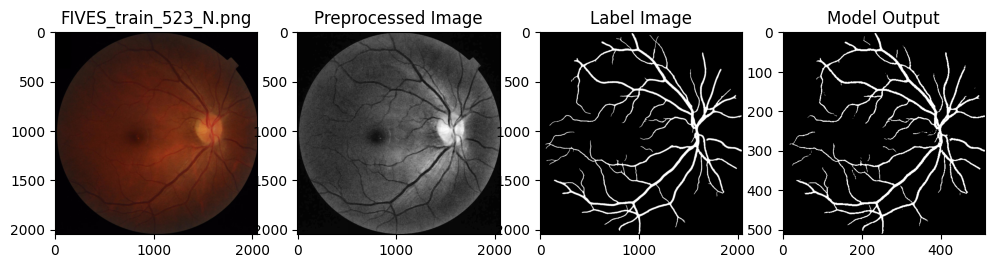

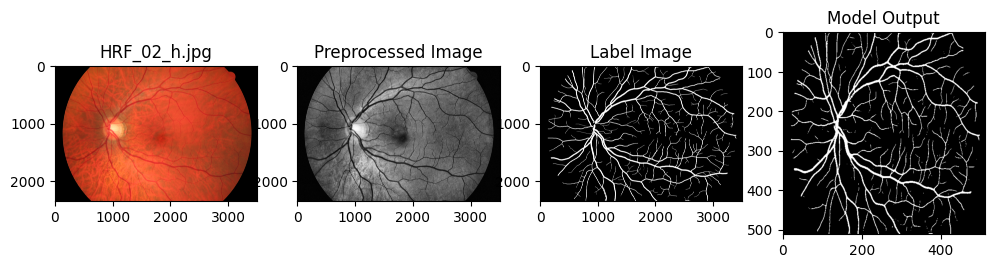

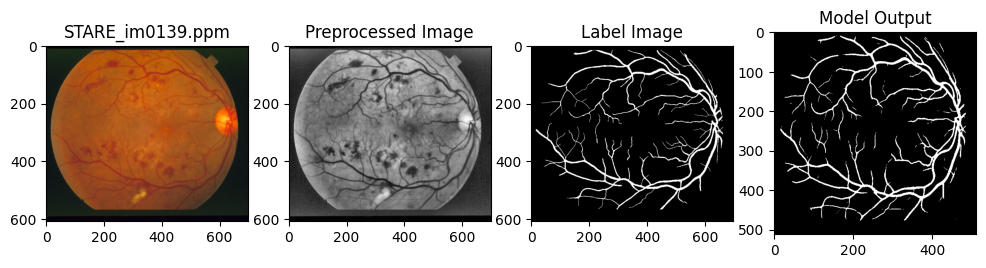

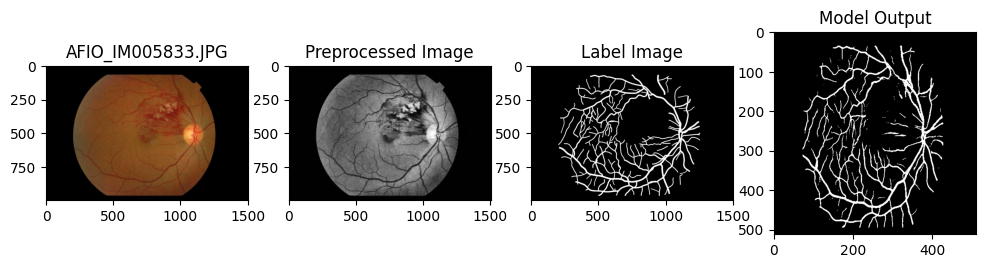

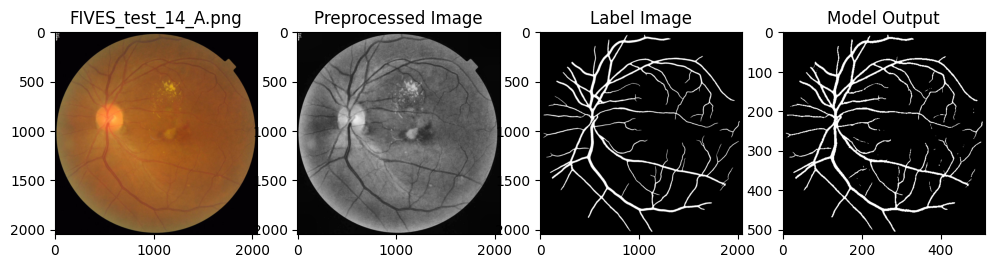

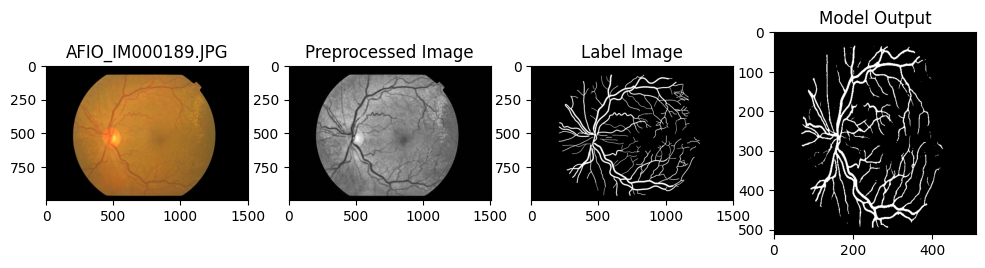

In [3]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot model result
num_images_to_select = 30
check_result.visualize_FG_result(model, num_images_to_select, SOURCE, INPUT_SHAPE, test_preproc)